In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [4]:
df=pd.read_csv(r"/content/sample_data/bank.csv")
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
# One-Hot Encoding for non-binary categorical columns
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
df1 = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Label Encoding for binary columns
binary_columns = {'default': {'no': 0, 'yes': 1},
                  'housing': {'no': 0, 'yes': 1},
                  'loan': {'no': 0, 'yes': 1},
                  'y': {'no': 0, 'yes': 1}}  # Target variable

# Replace the values with 0 and 1
df1.replace(binary_columns, inplace=True)

# Check the transformed dataset
df1.head()


<ipython-input-5-524b14929f85>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace(binary_columns, inplace=True)


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,False,False,False,False,False,True,False,False,False,True
1,33,0,4789,1,1,11,220,1,339,4,...,False,False,False,True,False,False,False,False,False,False
2,35,0,1350,1,0,16,185,1,330,1,...,False,False,False,False,False,False,False,False,False,False
3,30,0,1476,1,1,3,199,4,-1,0,...,False,True,False,False,False,False,False,False,False,True
4,59,0,0,1,0,5,226,1,-1,0,...,False,False,False,True,False,False,False,False,False,True


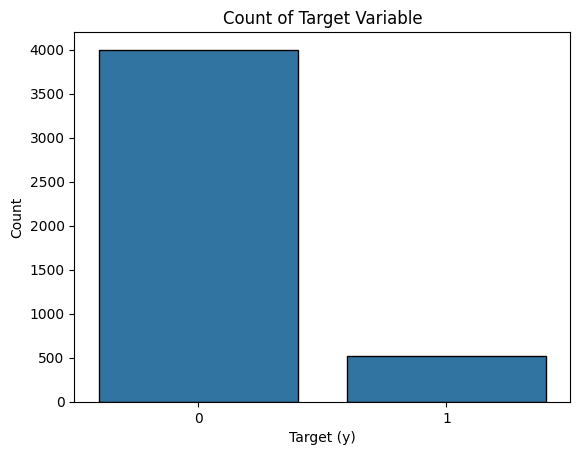

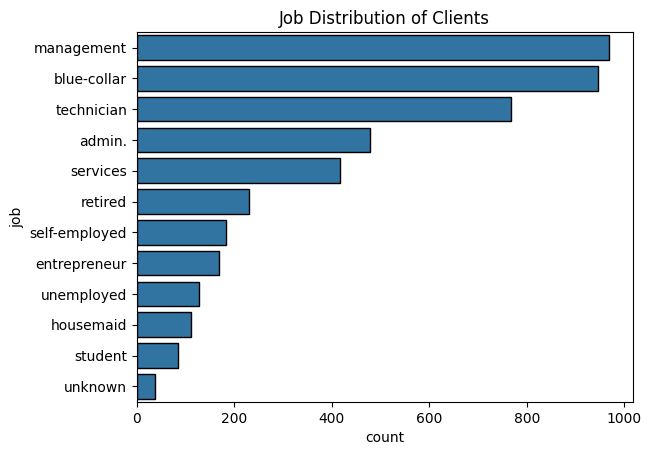

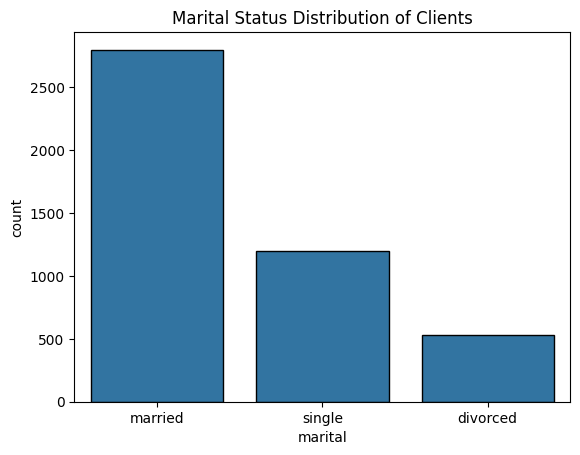

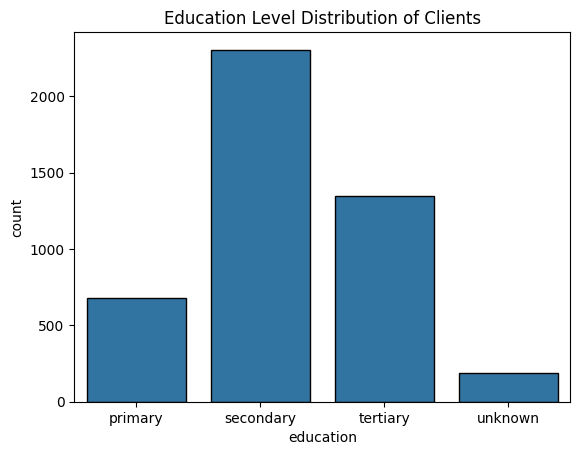

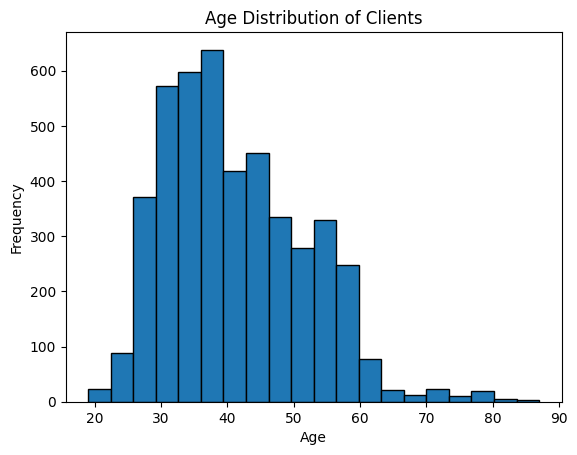

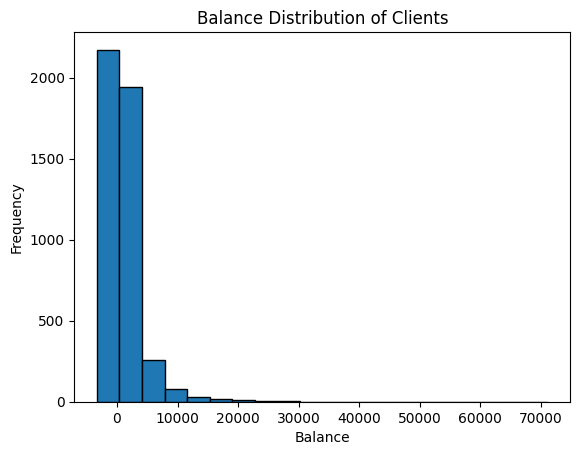

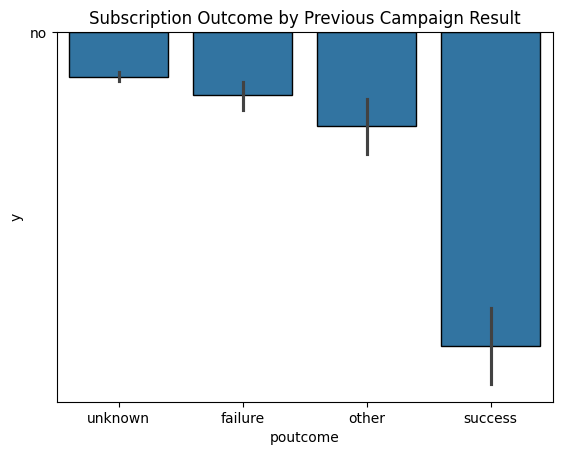

In [6]:
# Create the countplot for the 'y' column (assuming 'y' is the target column)
sns.countplot(x='y', data=df1,  edgecolor='black')

# Add labels and title
plt.title('Count of Target Variable')
plt.xlabel('Target (y)')
plt.ylabel('Count')
# Show the plot
plt.show()

# Plotting job distribution
sns.countplot(y='job', data=df, order=df['job'].value_counts().index,  edgecolor='black')
plt.title('Job Distribution of Clients')
plt.show()

# Plotting marital status distribution
sns.countplot(x='marital', data=df,  edgecolor='black')
plt.title('Marital Status Distribution of Clients')
plt.show()

# Plotting education distribution
sns.countplot(x='education', data=df, edgecolor='black')
plt.title('Education Level Distribution of Clients')
plt.show()

# Age distribution
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Balance distribution
plt.hist(df['balance'], bins=20, edgecolor='black')
plt.title('Balance Distribution of Clients')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()


# how the poutcome (outcome of the previous campaign) correlates with the client's subscription to the term deposit.
sns.barplot(x='poutcome', y='y', data=df,edgecolor='black' )
plt.title('Subscription Outcome by Previous Campaign Result')
plt.show()

In [7]:
#Identify the variables
X=df1.drop(columns=["y"],axis=1).astype(np.float32).values
y=df1["y"].astype(np.int32).values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Define the model
model=Sequential()

#add layers
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
#output layer
model.add(Dense(1, activation="sigmoid"))

#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

#train the model
model.fit(X_train,y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8590 - loss: 0.4719 - val_accuracy: 0.9033 - val_loss: 0.2639
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8937 - loss: 0.2671 - val_accuracy: 0.9116 - val_loss: 0.2385
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9003 - loss: 0.2367 - val_accuracy: 0.9006 - val_loss: 0.2390
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9076 - loss: 0.2205 - val_accuracy: 0.9033 - val_loss: 0.2338
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9205 - loss: 0.1872 - val_accuracy: 0.8992 - val_loss: 0.2378
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9223 - loss: 0.1743 - val_accuracy: 0.8978 - val_loss: 0.2358
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9272 - loss: 0.1780 - val_accuracy: 0.9006 - val_loss: 0.2417
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9336 - loss: 0.1655 - val_accuracy: 0.8964 - v

In [8]:
#predictions
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


data=pd.read_csv("/content/sample_data/sample_data (1).csv")
# Preprocess data - Example: Replace boolean values with integers
data.replace({True: 1, False: 0}, inplace=True)

# Standardize the sample data
X_test= scaler.transform(X_test)

X_test = data.values.astype(np.float32)
# Perform predictions
predicted = model.predict(X_test)

# Since it's a binary classification, use a threshold of 0.5
predicted_class = (predicted > 0.5).astype(int)
print(f"Predicted Class: {predicted_class[0][0]}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8834 - loss: 0.2515 
Test accuracy: 0.8939226269721985
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted Class: 1


<ipython-input-8-0b68c13a0f64>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({True: 1, False: 0}, inplace=True)
